## Первоначальная идея.

Изначально мы хотели взять датасет для анализа модных тенденций. Но оказалось, что там неудобная кодировка признаков + тяжело выявить целевой признак, поэтому от этой идеи пришлось отказаться в пользу более релевантной.

Ссылки на датасеты:
https://labelme.ru/datasets-catalog/494692309291?ysclid=lgdx1jy7h6124560879
https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

## Итоговая идея

Для анализа мы взяли готовый датасет "Spotify and Youtube". Он сожержит информацию по популярным трекам в Spotify и их клипам на Youtube.

Основная задача - определять популярность трека по различным характеристикам треков, такими как танцевальность, громкость, энергичность и тд.. И на основе данных будет построена модель машинного обучения, которая будет выявлять закономерности и строить прогнозы для новых треков.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\acer\Desktop\Проект по Андану\Spotify_Youtube.csv")
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [5]:
df.shape

(20718, 28)

In [6]:
df.drop(['Unnamed: 0', 'Album', 'Album_type', 'Uri', 'Description', 'Licensed', 'official_video', 'Stream', 'Key'], axis = 1, inplace=True)
df.head()

,Artist,Url_spotify,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0


In [7]:
# Ищем пропуски
df.isnull().sum()

Artist                0
Url_spotify           0
Track                 0
Danceability          2
Energy                2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
dtype: int64

In [8]:
#Почистили от нулей

df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Artist,Url_spotify,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20094,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,0.582,0.926,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0
20095,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,0.531,0.936,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0
20096,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,0.443,0.830,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0
20097,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,0.417,0.767,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20099 non-null  object 
 1   Url_spotify       20099 non-null  object 
 2   Track             20099 non-null  object 
 3   Danceability      20099 non-null  float64
 4   Energy            20099 non-null  float64
 5   Loudness          20099 non-null  float64
 6   Speechiness       20099 non-null  float64
 7   Acousticness      20099 non-null  float64
 8   Instrumentalness  20099 non-null  float64
 9   Liveness          20099 non-null  float64
 10  Valence           20099 non-null  float64
 11  Tempo             20099 non-null  float64
 12  Duration_ms       20099 non-null  float64
 13  Url_youtube       20099 non-null  object 
 14  Title             20099 non-null  object 
 15  Channel           20099 non-null  object 
 16  Views             20099 non-null  float6

In [10]:
df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments
count,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,20099.000000,2.009900e+04,2.009900e+04,2.009900e+04,2.009900e+04
mean,0.620341,0.635337,-7.657251,0.096240,0.288712,0.055870,0.191615,0.529241,120.630673,2.249283e+05,9.435381e+07,6.638502e+05,2.754543e+04
std,0.165293,0.213696,4.616015,0.110331,0.285776,0.193026,0.165614,0.245403,29.595116,1.259050e+05,2.755411e+08,1.791673e+06,1.934518e+05
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.519000,0.508000,-8.820000,0.035650,0.043800,0.000000,0.094000,0.339000,97.002000,1.803265e+05,1.841181e+06,2.165200e+04,5.130000e+02
50%,0.638000,0.666000,-6.536000,0.050600,0.189000,0.000002,0.125000,0.536000,119.965000,2.133380e+05,1.459319e+07,1.247020e+05,3.289000e+03
75%,0.741000,0.797000,-4.938000,0.104000,0.470000,0.000471,0.234000,0.726000,139.935000,2.524335e+05,7.061447e+07,5.221475e+05,1.436400e+04
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07


<AxesSubplot:>

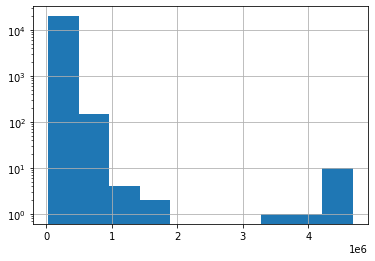

In [11]:
df['Duration_ms'].hist(log=True)

array([[<AxesSubplot:title={'center':'Energy'}>,
        <AxesSubplot:title={'center':'Loudness'}>,
        <AxesSubplot:title={'center':'Speechiness'}>],
       [<AxesSubplot:title={'center':'Acousticness'}>,
        <AxesSubplot:title={'center':'Instrumentalness'}>,
        <AxesSubplot:title={'center':'Liveness'}>],
       [<AxesSubplot:title={'center':'Valence'}>,
        <AxesSubplot:title={'center':'Tempo'}>, <AxesSubplot:>]],
      dtype=object)

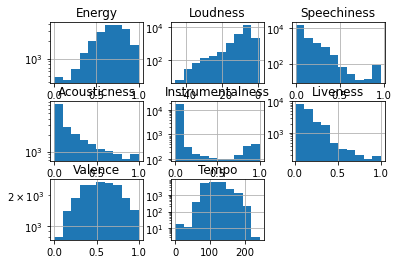

In [12]:
df_features = df[['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
df_features.hist(log=True)

<AxesSubplot:>

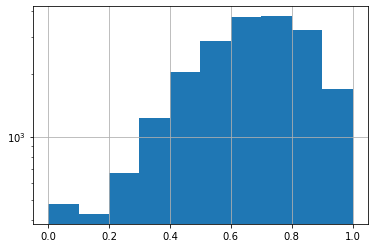

In [13]:
df['Energy'].hist(log=True)

<AxesSubplot:>

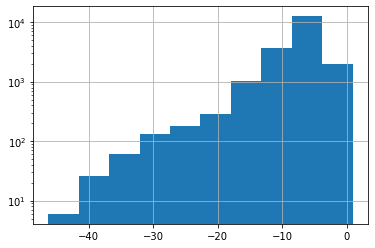

In [14]:
df['Loudness'].hist(log=True)

<AxesSubplot:>

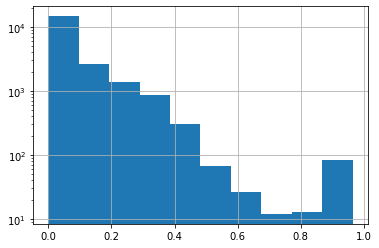

In [15]:
df['Speechiness'].hist(log=True)

<AxesSubplot:>

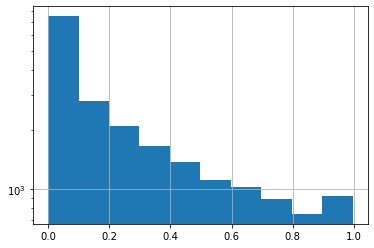

In [16]:
df['Acousticness'].hist(log=True)

<AxesSubplot:>

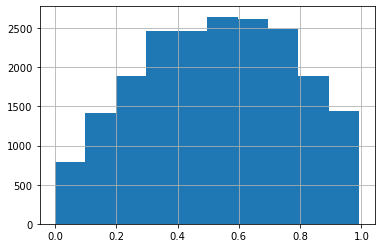

In [17]:
df['Valence'].hist()

<AxesSubplot:>

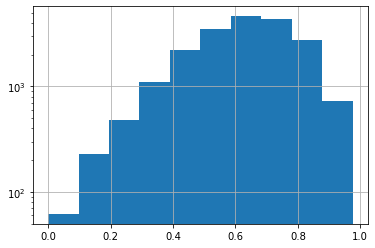

In [18]:
df['Danceability'].hist(log=True)

In [19]:
df_features.corr()

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
Energy,1.000000,0.745120,0.072986,-0.661429,-0.311536,0.172121,0.389921,0.155588
Loudness,0.745120,1.000000,0.045758,-0.551202,-0.548019,0.083902,0.311878,0.141844
Speechiness,0.072986,0.045758,1.000000,-0.084125,-0.111661,0.080207,0.059551,0.040820
Acousticness,-0.661429,-0.551202,-0.084125,1.000000,0.276748,-0.049629,-0.202595,-0.130511
Instrumentalness,-0.311536,-0.548019,-0.111661,0.276748,1.000000,-0.057789,-0.266880,-0.078986
Liveness,0.172121,0.083902,0.080207,-0.049629,-0.057789,1.000000,0.030426,0.004965
Valence,0.389921,0.311878,0.059551,-0.202595,-0.266880,0.030426,1.000000,0.091587
Tempo,0.155588,0.141844,0.040820,-0.130511,-0.078986,0.004965,0.091587,1.000000


Практически между всеми характристиками звука очень низкая корреляция, т.е. признаки линейно не связаны между собой.
Исключение - Loudness & Energy, у них коэффициент корреляции равен примерно 0,75, что отражает достаточно сильную связь.
Acousticness & Energy - тоже наблюдается умеренная отрицательная линейная зависимость.

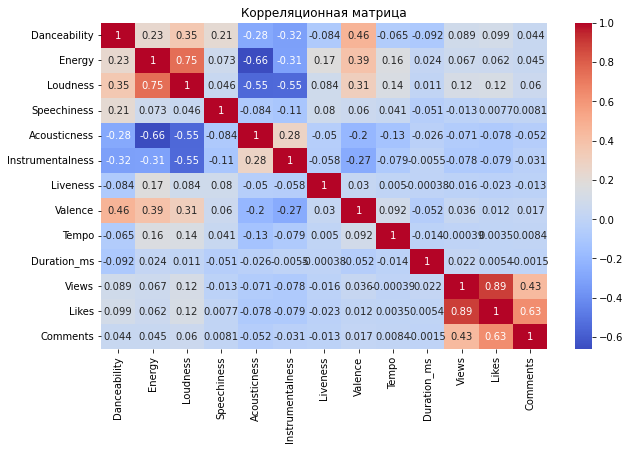

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

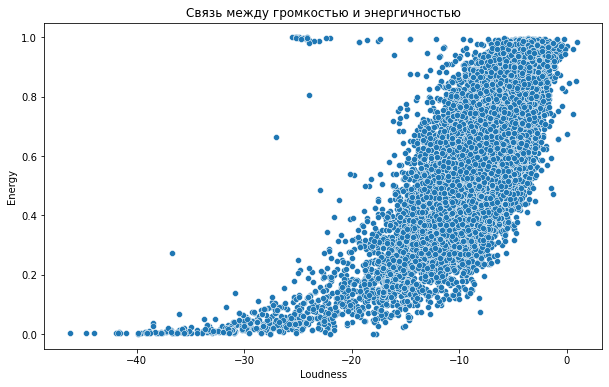

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Loudness', y='Energy', data=df)
plt.title('Связь между громкостью и энергичностью')
plt.show()

In [22]:
df_features['Danceability'] = df['Danceability']
mat = df_features.corr()

In [23]:
mat['Danceability']

Energy              0.234638
Loudness            0.353343
Speechiness         0.214938
Acousticness       -0.276924
Instrumentalness   -0.317689
Liveness           -0.083794
Valence             0.463827
Tempo              -0.065041
Danceability        1.000000
Name: Danceability, dtype: float64

У меня есть предположение, что фактор, насколько под трек удобно танцевать, зависит от совокупности характеристик музыки - энергичность, громкость, акустичность и тд. 
Однако сильной корреляции между признаком Danceability и остальными я не наблюдаю. Возможно, тут надо рассматривать все факторы в совокупности (как раз это я и хочу сделать дальше) 

Так как корреляция между Energy и Loudness довольно высока (0.745120). Это может указывать на то, что треки, которые громкие, также обычно более энергичные, поэтому создадим новый признак, который будет учитывать и энергичность, и громкость трека. Для этого перемножим эти два значения:

In [24]:
df['Loud_and_Energetic'] = df['Energy'] * df['Loudness']

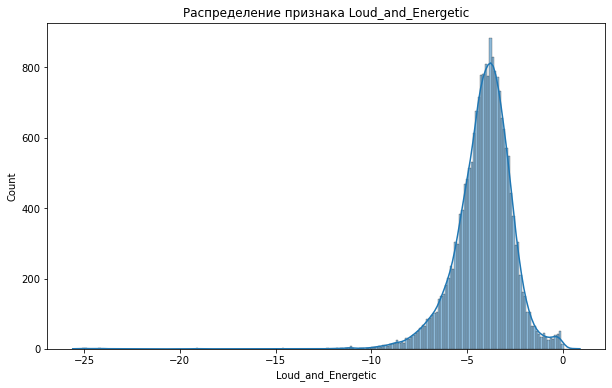

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['Loud_and_Energetic'], kde=True)
plt.title('Распределение признака Loud_and_Energetic')
plt.show()

Так же стоит отиметить, что корреляция между Acousticness и Energy отрицательная и довольно высока (-0.661429). Это может указывать на то, что треки, которые не акустические, обычно более энергичные. Создадим новый признак, который будет учитывать этот факт, для этого вычтем Acousticness из Energy:

In [26]:
df['Not_Acoustic'] = df['Energy'] - df['Acousticness']

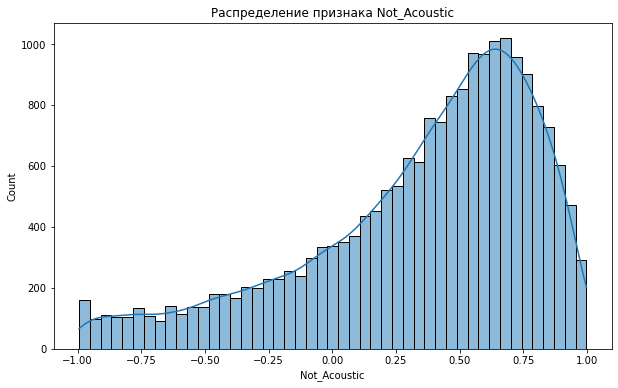

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(df['Not_Acoustic'], kde=True)
plt.title('Распределение признака Not_Acoustic')
plt.show()

Заметим еще одну отрицательную корреляцию, на этот раз между Instrumentalness и Loudness (-0.548019). Это может указывать на то, что треки, которые менее инструментальны, обычно более громкие. Создадим новый признак, который будет учитывать эту информацию. Для этого вычтем Instrumentalness из Loudness:

In [28]:
df['Non_Instrumental_Loudness'] = df['Loudness'] - df['Instrumentalness']

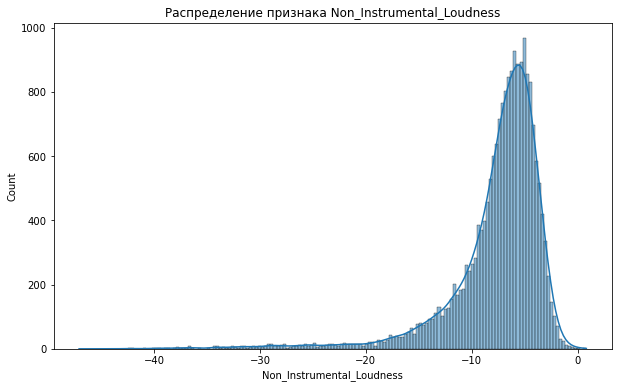

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['Non_Instrumental_Loudness'], kde=True)
plt.title('Распределение признака Non_Instrumental_Loudness')
plt.show()

## Гипотезы

На основе проведенного анализа мы выявили несколько гипотез, которые хотим проверить.

1. Признак "Loud_and_Energetic" не влияет на кол-во просмотров. Мат. ожидания кол-ва просмотров трека с низким значением признака и с высоким равны.
2. Признак "Non_Instrumental_Loudness" имеет нормальное распределение.
3. Чем выше значение признака "Danceability", тем больше эмоций трек вызывает у пользователей и тем больше доля лайков к общему числу просмотров.

### Проверка гипотезы №1

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_l = \mu_{nl} \\
&H_1: \hspace{2mm} \mu_l \neq \mu_{nl}
\end{aligned}
$$

Для начала надо разделить общую выборку на две части: треки, где значения признака "Loud_and_Energetic" выше среднего, и треки, где - ниже среднего. Дальше я буду использовать t-test для проверки гипотез, т.к. дисперсии признака неизвестны.

In [64]:
sample_a = df[df['Loud_and_Energetic'] < df['Loud_and_Energetic'].mean()]
sample_b = df[df['Loud_and_Energetic'] >= df['Loud_and_Energetic'].mean()]

t_obs = sts.ttest_ind(sample_a['Views'], sample_b['Views'])[0]

alpha = 0.05
t_crit_right = stats.t.ppf(1 - alpha/2, len(sample_a['Views']+len(sample_a['Views'])-2))
t_crit_left = stats.t.ppf(alpha/2, len(sample_a['Views']+len(sample_a['Views'])-2))

if (t_obs < t_crit_left) | (t_obs > t_crit_right): 
    print('H0 отвергается в пользу альтернативной гипотезы H1')
else: 
    print('H0 не отвергается')

H0 отвергается в пользу альтернативной гипотезы H1


Таким образом, можно сделать вывод, что есть зависимость кол-ва просмотров клипа на трек от значений его признака "Loud_and_Energetic".

### Проверка гипотезы №2

$$
\begin{aligned}
&H_0: \hspace{2mm} X_1...X_n {\sim} N(\mu,\sigma^2)
\end{aligned}
$$

Для проверки гипотезы использую тест Колмагорова-Смирнова, т.к. он тут отлично подходит.

In [65]:
from scipy.stats import kstest
kstest(df['Non_Instrumental_Loudness'], 'norm')

KstestResult(statistic=0.9771369125380189, pvalue=0.0)

p-value меньше, чем 0.05, поэтому гипотеза отвергается, т.е. распределение признака "Non_Instrumental_Loudness" не нормальное.

### Проверка гипотезы №3

Разделим выборку на две части: где значение признака "Danceability" выше или ниже среднего. И сравним, действительно ли математическое ожидание для первой выборки больше, чем для второй. Для этого использую асимптотический тест равенства средних.

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = \mu_{2} \\
&H_1: \hspace{2mm} \mu_1 > \mu_{2}
\end{aligned}
$$

In [73]:
sample_2 = df[df['Danceability'] < df['Danceability'].mean()]
sample_1 = df[df['Danceability'] >= df['Danceability'].mean()]

In [71]:
# функция из семинара №11

def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))
    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (8, 4))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)
    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value

0.5279772251212863

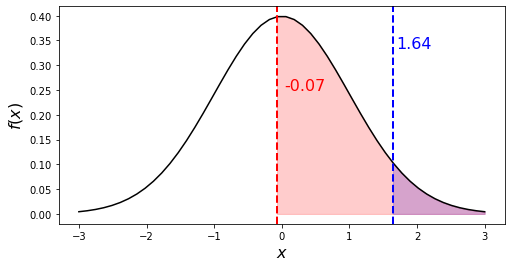

In [77]:
sample_1['dolya'] = sample_1['Comments']/sample_1['Views']
sample_2['dolya'] = sample_2['Comments']/sample_2['Views']

mean_hat_sample = sample_1['dolya'].mean() - sample_2['dolya'].mean()
std_hat_sample = sample_1['dolya'].std() - sample_2['dolya'].std()

asy_mean_test(mean_hat =  mean_hat_sample, std_hat = std_hat_sample, mu_0=0, 
                   alpha=0.05, alternative='larger', margin=3)

Таким образом, p-value больше, чем 0.05, поэтому гипотеза H0 не отвергается. Доля комментариев от просмотров не зависит от признака "Danceability".

## Машинное обучение

Нас интересует признак Danceability и мы хотим посмотреть, можно ли его предсказать по таким параметрам, как Loudness & Energy, Non_Instrumental_Loudness, Not_Acoustic, Valence. Это признаки, с которыми наблюдается наибольшая корреляция у признака Danceability.

Для данной задачи лучше всего подходит модель линейной регрессии.

In [82]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

In [83]:
features = ['Loud_and_Energetic', 'Non_Instrumental_Loudness', 'Not_Acoustic', 'Valence']
target = 'Danceability'

X_train, X_test = df_train[features], df_test[features]
y_train, y_test = df_train[target], df_test[target]

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [86]:
model.intercept_

0.5436529521885343

In [88]:
model.coef_

array([0.00036053, 0.00803892, 0.00253237, 0.26331931])

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))

print('mse =', mse)
print('mae =', mae)

mse = 0.020838973763189116
mae = 0.11564908766669595


Ошибки mae и mse допустимого размера, что говорит о хорошем качестве модели. Коэффициенты перед переменными тоже адекватных размеров.